In [1]:
# Import modules
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import os


def work_space(path):
    while True:
        if os.path.split(path)[1] != "Phys117":
            path = os.path.split(path)[0]
        else:
            return path.replace("\\", "/")

work_dir = work_space(os.getcwd())
data_path = work_dir + "/Markus/Hub/VariableData/"
folders = os.listdir(data_path)
data_files = [data_path + data_file for data_file in folders]
stuffs = ["electron", "jet", "MET", "muon", "photon", "tau"]
data_variables = ["met", "HT", "stuff_amount", "ptmax", "phi_diff"]
file_amounts = [2, 18, 3]


def unpacker(folder_data, new_folder_data):
    for nested_list in folder_data:
        if type(nested_list) == list:
            unpacker(nested_list, new_folder_data)
        else:
            new_folder_data.append(nested_list)
    folder_data = new_folder_data
    return folder_data


def data_binner(data, binsize):
    data = unpacker(data, [])

    if len(data) == 0:
        x = [bin * binsize for bin in range(200)]
        y = [0 for bin in range(200)]
        return x, y

    max_value = np.max(data)
    bins = int(np.round(max_value / binsize))
    bins = np.arange(0, bins)
    data = np.array(data)
    x, y = [], []

    for bin in range(len(bins)):
        temp = data
        temp = temp[temp <= (bin + 1/2)*binsize]
        temp = temp[(bin - 1/2)*binsize < temp]
        if len(temp) != 0:
            y.append(len(temp))
            x.append(bin*binsize)

    y = y/np.sum(y)

    return x, y


def plot_filter(interval_data, filter_strength):
    interval_data = sorted(interval_data)
    cutoff = round((len(interval_data) * filter_strength))
    interval_data = interval_data[:cutoff]
    x_min = np.min(interval_data)
    x_max = np.max(interval_data)
    extra = (x_max - x_min) / 10
    return [x_min - extra, x_max + extra]


def sampler(output_dataframe, output_filenames, file_amounts, combine_data):
    from random import sample

    output_dataframe = [[(dataframe, filename) for dataframe, filename in zip(dataframes, filenames)] for dataframes, filenames in zip(output_dataframe, output_filenames)]
    samples = [sample(dataframes, file_amount) for dataframes, file_amount in zip(output_dataframe, file_amounts)]

    if combine_data:
        output_dataframe = [pd.concat([sample[0] for sample in dataframes]) for dataframes in samples]
        labels = folders
    else:
        output_dataframe = [[sample[0] for sample in dataframes] for dataframes in samples]
        labels = [[sample[1] for sample in dataframes] for dataframes in samples]
    
    output_dataframe = unpacker(output_dataframe, [])
    labels = unpacker(labels, [])
        

    return output_dataframe, labels


def plotter(data_variables, output_dataframe, output_filenames, filter_strengths, binsizes):

    for variable_index, variable in enumerate(data_variables):
        fig = plt.figure()
        style = "seaborn-darkgrid"
        plt.style.use(style)
        title = variable + " Distribution"
        fig.suptitle(title)
        plt.xlabel(variable)
        plt.ylabel("frequency")

        binsize = binsizes[variable_index] if type(binsizes) == list else binsizes
        filter_strength = filter_strengths[variable_index] if type(filter_strengths) == list else filter_strengths
        interval = np.concatenate([dataframe[variable] for dataframe in output_dataframe])
        plt.xlim(plot_filter(interval, filter_strength))

        for dataframe, label in zip(output_dataframe, output_filenames):
            print(dataframe)
            raw_data = dataframe[variable]
            bins, counts = data_binner(raw_data, binsize)
            plt.plot(bins, counts, label = label)
        
        plt.legend(prop = {'size': 8})
        plt.show()

In [2]:
from FilesFunc import files
folder_list, filename_list = files(data_path, folders, file_amounts)


foldered_dataframes = [[pd.read_csv(data_file).drop("Unnamed: 0", axis = 1) for data_file in folder_files] for folder_files in folder_list]

In [3]:
data_sample, labels = sampler(foldered_dataframes, filename_list, file_amounts = [0, 18, 3], combine_data = False)

C:\Users\mhals\AppData\Local\Temp\ipykernel_19644\2622448195.py:97: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


            HT      met  phi_diff    ptmax  stuff_amount
0      5573.07   299.10  2.321000  2085.83             7
1      8951.71   770.31  0.385000  2736.08             7
2      9472.02   628.21  0.278407  3357.58             9
3      7746.55   262.74  1.002000  2584.25             9
4      8945.66   314.69  0.421407  3007.03            12
...        ...      ...       ...      ...           ...
9638  11490.23  1094.92  0.022593  5217.32             7
9639   7671.98   771.78  1.154593  2727.45             5
9640   7587.03  1141.17  1.812593  1858.83             9
9641   8008.29   983.20  0.230593  2845.48            10
9642   7701.18   202.91  1.475000  3703.03             5

[9643 rows x 5 columns]
            HT      met  phi_diff    ptmax  stuff_amount
0      9971.37  1793.07  3.113593  2826.84             8
1     10050.39   565.46  2.883185  4234.40             8
2      9354.67   245.81  0.552407  4171.28            14
3      8456.69  4114.44  0.000000  4114.44             7
4     

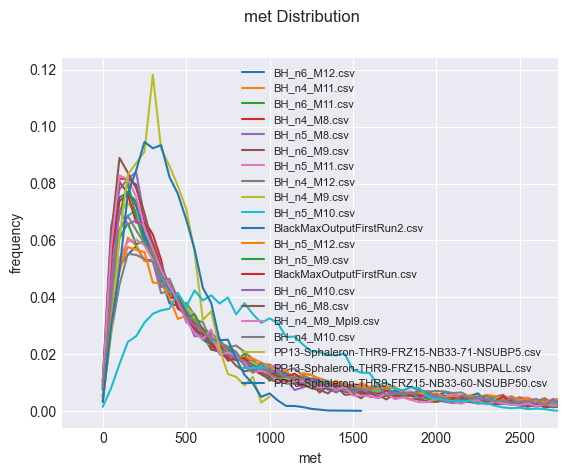

C:\Users\mhals\AppData\Local\Temp\ipykernel_19644\2622448195.py:97: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


            HT      met  phi_diff    ptmax  stuff_amount
0      5573.07   299.10  2.321000  2085.83             7
1      8951.71   770.31  0.385000  2736.08             7
2      9472.02   628.21  0.278407  3357.58             9
3      7746.55   262.74  1.002000  2584.25             9
4      8945.66   314.69  0.421407  3007.03            12
...        ...      ...       ...      ...           ...
9638  11490.23  1094.92  0.022593  5217.32             7
9639   7671.98   771.78  1.154593  2727.45             5
9640   7587.03  1141.17  1.812593  1858.83             9
9641   8008.29   983.20  0.230593  2845.48            10
9642   7701.18   202.91  1.475000  3703.03             5

[9643 rows x 5 columns]
            HT      met  phi_diff    ptmax  stuff_amount
0      9971.37  1793.07  3.113593  2826.84             8
1     10050.39   565.46  2.883185  4234.40             8
2      9354.67   245.81  0.552407  4171.28            14
3      8456.69  4114.44  0.000000  4114.44             7
4     

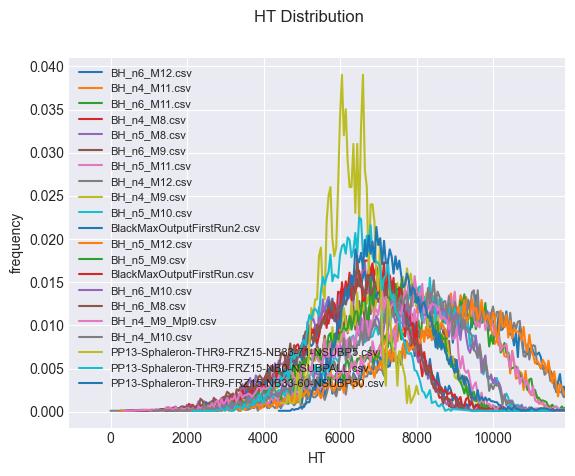

C:\Users\mhals\AppData\Local\Temp\ipykernel_19644\2622448195.py:97: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


            HT      met  phi_diff    ptmax  stuff_amount
0      5573.07   299.10  2.321000  2085.83             7
1      8951.71   770.31  0.385000  2736.08             7
2      9472.02   628.21  0.278407  3357.58             9
3      7746.55   262.74  1.002000  2584.25             9
4      8945.66   314.69  0.421407  3007.03            12
...        ...      ...       ...      ...           ...
9638  11490.23  1094.92  0.022593  5217.32             7
9639   7671.98   771.78  1.154593  2727.45             5
9640   7587.03  1141.17  1.812593  1858.83             9
9641   8008.29   983.20  0.230593  2845.48            10
9642   7701.18   202.91  1.475000  3703.03             5

[9643 rows x 5 columns]
            HT      met  phi_diff    ptmax  stuff_amount
0      9971.37  1793.07  3.113593  2826.84             8
1     10050.39   565.46  2.883185  4234.40             8
2      9354.67   245.81  0.552407  4171.28            14
3      8456.69  4114.44  0.000000  4114.44             7
4     

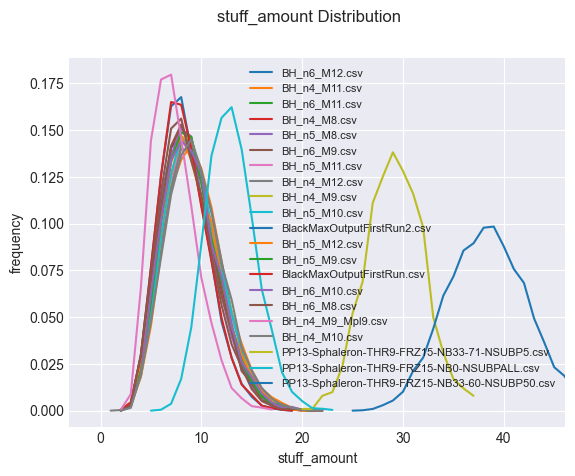

C:\Users\mhals\AppData\Local\Temp\ipykernel_19644\2622448195.py:97: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


            HT      met  phi_diff    ptmax  stuff_amount
0      5573.07   299.10  2.321000  2085.83             7
1      8951.71   770.31  0.385000  2736.08             7
2      9472.02   628.21  0.278407  3357.58             9
3      7746.55   262.74  1.002000  2584.25             9
4      8945.66   314.69  0.421407  3007.03            12
...        ...      ...       ...      ...           ...
9638  11490.23  1094.92  0.022593  5217.32             7
9639   7671.98   771.78  1.154593  2727.45             5
9640   7587.03  1141.17  1.812593  1858.83             9
9641   8008.29   983.20  0.230593  2845.48            10
9642   7701.18   202.91  1.475000  3703.03             5

[9643 rows x 5 columns]
            HT      met  phi_diff    ptmax  stuff_amount
0      9971.37  1793.07  3.113593  2826.84             8
1     10050.39   565.46  2.883185  4234.40             8
2      9354.67   245.81  0.552407  4171.28            14
3      8456.69  4114.44  0.000000  4114.44             7
4     

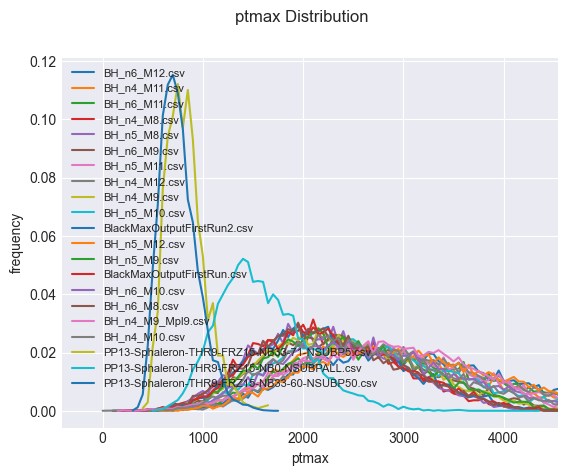

C:\Users\mhals\AppData\Local\Temp\ipykernel_19644\2622448195.py:97: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


            HT      met  phi_diff    ptmax  stuff_amount
0      5573.07   299.10  2.321000  2085.83             7
1      8951.71   770.31  0.385000  2736.08             7
2      9472.02   628.21  0.278407  3357.58             9
3      7746.55   262.74  1.002000  2584.25             9
4      8945.66   314.69  0.421407  3007.03            12
...        ...      ...       ...      ...           ...
9638  11490.23  1094.92  0.022593  5217.32             7
9639   7671.98   771.78  1.154593  2727.45             5
9640   7587.03  1141.17  1.812593  1858.83             9
9641   8008.29   983.20  0.230593  2845.48            10
9642   7701.18   202.91  1.475000  3703.03             5

[9643 rows x 5 columns]
            HT      met  phi_diff    ptmax  stuff_amount
0      9971.37  1793.07  3.113593  2826.84             8
1     10050.39   565.46  2.883185  4234.40             8
2      9354.67   245.81  0.552407  4171.28            14
3      8456.69  4114.44  0.000000  4114.44             7
4     

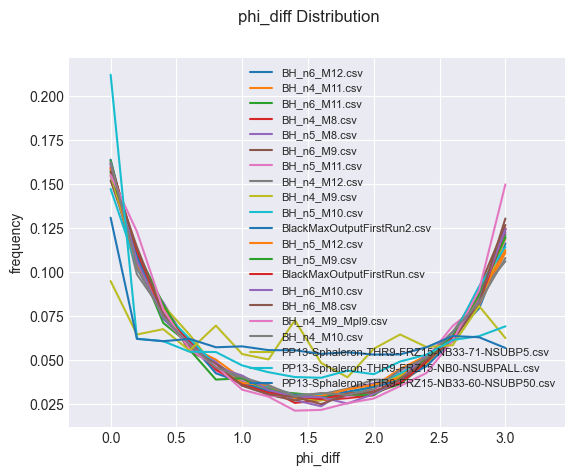

In [4]:
plotter(data_variables, data_sample, labels, filter_strengths = [0.95, 0.975, 0.99, 0.95, 1], binsizes = [50, 50, 0.5, 50, 0.2])